Vadim Pislari 342C3

Să se ruleze prima parte de cod pentru a fi importate fișierele input.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('A fost încarcat fișierul "{name}" cu lungimea {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Task 0

Init functions

In [ ]:
class Ver(object):
  def __init__(self, ind, pos_x, pos_y, obst):
    self.__ind = ind
    self.__pos_x = pos_x
    self.__pos_y = pos_y
    self.__obst = obst
  def __str__(self):
    res = self.__ind + " " +self.__pos_x + " " +self.__pos_y + " " + self.__obst
    return res
  def get_id(self):
    return self.__ind
  def get_posX(self):
    return int(self.__pos_x)
  def get_posY(self):
    return int(self.__pos_y)
  def get_obst(self):
    return self.__obst

class Graph(object):
    def __init__(self, graph=None):
        if graph == None:
            graph = {}
        self.__graph = graph
    def addVer(self, ver):
        if ver not in self.__graph:
            self.__graph[ver] = []
    def add_edge(self, ver1, ver2, cost):
        if ver1 in self.__graph:
            self.__graph[ver1].append((ver2, cost))
        else:
            self.__graph[ver1] = [(ver2, cost)]
    def printGraph(self):
        for ver in self.__graph.keys():
            print(ver_list[ver])
            print(self.__graph[ver])
    def get_next_idpositions(self, id):
      return self.__graph[id]


def init_env(file_name):
  global idMouse,idCheese, x, y
  full_file_name = "/content/" + file_name
  file = open(full_file_name, "r")
  file_content = file.read()
  file_lines = file_content.splitlines()
  [x1,y1] = file_lines[0].split(", ")
  [x2,y2] = file_lines[1].split(", ")
  size =  int(file_lines[2])
  l_position = size + 3
  for i in range(3, l_position):
    v_i = file_lines[i].split(", ")
    if int(v_i[1]) > x:
      x = int(v_i[1])
    if int(v_i[2]) > y:
      y = int(v_i[2])
    if v_i[1] == x1 and v_i[2] == y1:
      idMouse = v_i[0]
    if v_i[1] == x2 and v_i[2] == y2:
      idCheese = v_i[0]
    if len(v_i) > 3:
      ver_list[v_i[0]] = Ver(v_i[0], v_i[1], v_i[2], '1')
    else:
      ver_list[v_i[0]] = Ver(v_i[0], v_i[1], v_i[2], '0') 
    graph.addVer(v_i[0])
  edge_size = int(file_lines[l_position])
  for i in range(l_position + 1, len(file_lines)):
    v_i = file_lines[i].split(", ")
    graph.add_edge(v_i[0], v_i[1], v_i[2])
    graph.add_edge(v_i[1], v_i[0], v_i[2])

def get_next_states(state):
  positions = graph.get_next_idpositions(state.get_id())
  nstates = []
  for i in positions:
    if ver_list[i[0]].get_obst() == '0':
      nstates.append((ver_list[i[0]], i[1]))
  return nstates

def euclidean_distance(state):
  global idCheese
  cheeseState = ver_list[idCheese]
  x1 = state.get_posX()
  y1 = state.get_posY()
  x2 = cheeseState.get_posX()
  y2 = cheeseState.get_posY()
  return int(math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2))

def h_function(state):
  global heuristic
  if heuristic == 0:
    return euclidean_distance(state)
  elif heuristic == 1:
    return new_heuristic(state)
  else:
    return new_heuristic2(state)

Task 1

​Depth First Iterative Deepening

In [ ]:
def dfid(s, g, U, visited, pcost):
  global idCheese, Uprim, costT
  if s == idCheese:
    print("Cost: " + str(g))
    costT = g
    return [s]
  if visited[s] == 1 and g >= pcost[s]:
    return {}
  visited[s] = 1
  pcost[s] = g
  for v in get_next_states(ver_list[s]):
    cost = int(v[1])
    if g + cost <= U:
      p = dfid(v[0].get_id(), g + cost, U, visited, pcost)
      if p != {}:
        p.append(s)
        return p
    else:
      if g + cost <= Uprim:
        Uprim = g + cost
  return {}

def buclaDfid(s):
  global Uprim
  bestPath = {}
  while bestPath == {} and Uprim != inf:
    visited = {}
    cost = {}
    for i in ver_list.keys():
      visited[i] = 0
      cost[i] = inf
    U = Uprim
    Uprim = inf
    bestPath = dfid(s, 0, U, visited, cost)

  return bestPath

Task 2

​Iterative Deepening A*

In [ ]:
def ida(s, g, U, visited, pcost):
  global idCheese, UprimIda, cost, costT
  if s == idCheese:
    print("Cost: " + str(g))
    costT = g
    return [s]
  if visited[s] == 1 and g >= pcost[s]:
    return {}
  visited[s] = 1
  pcost[s] = g
  for v in get_next_states(ver_list[s]):
    h = h_function(v[0])
    cost = int(v[1])
    if g + cost + h <= U:
      p = ida(v[0].get_id(), g + cost, U, visited, pcost)
      if p != {}:
        p.append(s)
        return p
    else:
      if g + cost + h <= UprimIda:
        UprimIda = g + cost + h
  return {}

def buclaIDA(s):
  global UprimIda
  bestPath = {}
  while bestPath == {} and UprimIda != inf:
    visited = {}
    cost = {}
    for i in ver_list.keys():
      visited[i] = 0
      cost[i] = inf
    U = UprimIda
    UprimIda = inf
    bestPath = ida(s, 0, U, visited, cost)
  return bestPath

Task 3

​Learning Real Time A*

In [ ]:
def lrtaStar():
  global idCheese, idMouse, cost, costT
  H = {}
  cost = {}
  for i in ver_list.keys():
    H[i] = 0
    cost[i] = 0
  best_path = []
  ant_path = []
  while True: 
    for i in ver_list.keys():
      cost[i] = 0
    s = idMouse
    H[s] = euclidean_distance(ver_list[s])
    best_path.append(s)
    while s != idCheese:
      mn = inf 
      min_s = 0
      cst = 0
      for v in get_next_states(ver_list[s]):
        v_id = v[0].get_id()
        val = cost[s] + H[v_id]
        if val < mn:
          mn = val
          cst = cost[s] + int(v[1])
          min_s = v_id
      if mn > H[s]:
        H[s] = mn 
      cost[min_s] = cst
      s = min_s
      best_path.append(s)
    if best_path == ant_path:
      costT = cost[s]
      print("Cost: " + str(costT))
      return best_path
    ant_path = copy.deepcopy(best_path)
    best_path = []

Afisarea drumului

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

def print_map(bestPath):
  global x,y, idMouse
  data = []
  for i in range(y):
    line = []
    for j in range(x):
      line.append(0)
    data.append(line)
  for i in ver_list.keys():
    if ver_list[i].get_obst() == '1':
      x_pos = ver_list[i].get_posX()
      y_pos = ver_list[i].get_posY()
      data[y_pos][x_pos] = 1

  mouse = ver_list[idMouse]
  data[mouse.get_posY()][mouse.get_posX()] = 2

  cheese = ver_list[idCheese]
  data[cheese.get_posY()][cheese.get_posX()] = 3
  if bestPath != {}:
    for i in bestPath[1:-1]:
      path = ver_list[i]
      data[path.get_posY()][path.get_posX()] = 4

  cmap = colors.ListedColormap(['white', 'black', 'blue','yellow','brown'])
  bounds = [0,1,2,3,4,5]
  norm = colors.BoundaryNorm(bounds, cmap.N)
  fig, ax = plt.subplots()
  ax.imshow(data, cmap=cmap, norm=norm)
  ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=0.1)
  ax.set_xticks(np.arange(0, x, 1));
  ax.set_yticks(np.arange(0, y, 1));
  plt.show()

In [ ]:
graph = Graph()
ver_list = {}
# pozitia soarecelui
idMouse = 0
# pozitia la cascaval
idCheese = 0
# dimensiunea hartii
x = 0
y = 0
inf = 150000000000
Uprim = 0
UprimIda = 0
costT = 0
heuristic = 0

def set_heuristic(val):
  global heuristic
  heuristic = val

def init_global_variables(file_name):
  global x, y, idMouse, idCheese, graph, ver_list, inf, Uprim, UprimIda, costT, heuristic
  graph = Graph()
  ver_list = {}
  idMouse = 0
  idCheese = 0
  Uprim = 0
  inf = 150000000000
  x = 0
  y = 0
  init_env(file_name)
  x += 1
  y += 1
  UprimIda = h_function(ver_list[idCheese])
  costT = 0
  set_heuristic(0)

def run_homework(file_name):
  init_global_variables(file_name)
  print("File: " + file_name)
  #run_task1
  print("Task 1:")
  time1 = time.time()
  bestPath = buclaDfid(idMouse)
  cost1 = costT
  print_map(bestPath)
  print("BestPath: " + str(bestPath))
  time2 = time.time()
  print("Timpul de rulare: " + str(time2-time1) + "\n")
  print("-------------------------------------------\n")
  #run_task2
  print("Task 2:")
  bestPath = buclaIDA(idMouse)
  cost2 = costT
  print_map(bestPath)
  print("BestPath: " + str(bestPath))
  time3 = time.time()
  print("Timpul de rulare: " + str(time3-time2) + "\n")
  print("-------------------------------------------\n")
  #run_task3
  print("Task 3:")
  bestPath = lrtaStar()
  cost3 = costT
  print_map(bestPath)
  print("BestPath: " + str(bestPath))
  time4 = time.time()
  print("Timpul de rulare: " + str(time4-time3) + "\n")
  print("-------------------------------------------\n")
  #run_task4 IDA*
  print("Task 4(Euristica schimbata pentru IDA*):")
  init_global_variables(file_name)
  time4 = time.time()
  set_heuristic(1)
  bestPath = buclaIDA(idMouse)
  cost4 = costT
  print_map(bestPath)
  time5 = time.time()
  print("Timpul de rulare: " + str(time5-time4) + "\n")
  print("-------------------------------------------\n")
  #run_task4 LRTA*
  print("Task 4(Euristica schimbata pentru LRTA*):")
  bestPath = lrtaStar()
  cost5 = costT
  print_map(bestPath)
  time6 = time.time()
  print("Timpul de rulare: " + str(time6-time5) + "\n")
  print("-------------------------------------------\n")
  return [[time2-time1,time3-time2,time4-time3,time5-time4,time6-time5],[cost1,cost2,cost3,cost4,cost5]]
  

Functia de plotare a graficilor

In [ ]:
def time_plot(total_plot):
  tests = []
  dfidres = []
  idadres = []
  lratres = []
  costs1 = []
  costs2 = []
  costs3 = []
  new_h = []
  lrta_new = []
  costnew_h = []
  i = 1 
  for test in total_plot:
    tests.append(i)
    dfidres.append(test[0][0])
    idadres.append(test[0][1])
    lratres.append(test[0][2])
    costs1.append(test[1][0])
    costs2.append(test[1][1])
    costs3.append(test[1][2])
    new_h.append(test[0][3])
    costnew_h.append(test[1][3])
    lrta_new.append(test[0][4])
    i+=1

  plt.plot(tests, dfidres, label = "DFID") 
  plt.plot(tests, idadres, label = "IDA*") 
  plt.plot(tests, lratres, label = "LRTA*") 
  plt.xlabel('Input test') 
  plt.ylabel('Time') 
  plt.legend()   
  plt.title('Time/Test')
  plt.show()

  plt.plot(tests, costs1, label = "DFID") 
  plt.plot(tests, costs2, label = "IDA*") 
  plt.plot(tests, costs3, label = "LRTA*") 
  plt.xlabel('Input test') 
  plt.ylabel('Cost') 
  plt.title('Cost/Test')
  plt.legend()   
  plt.show() 

  plt.plot(tests, idadres, label = "Euclidian") 
  plt.plot(tests, new_h, label = "sqrtEuclidian") 
  plt.xlabel('Input test') 
  plt.ylabel('Time') 
  plt.title('Time/Test for different heuristics IDA*')
  plt.legend()   
  plt.show() 

  plt.plot(tests, lratres, label = "Euclidian") 
  plt.plot(tests, lrta_new, label = "sqrtEuclidian") 
  plt.xlabel('Input test') 
  plt.ylabel('Time') 
  plt.title('Time/Test for different heuristics LRTA*')
  plt.legend()   
  plt.show() 

Euristica noua

In [ ]:
def new_heuristic(state):
  return int(math.sqrt(euclidean_distance(state)))

def new_heuristic2(state):
  return euclidean_distance(state)/2

Main Program 


File: input1.txt
Task 1:
Cost: 18


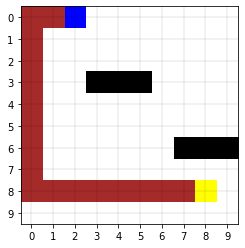

BestPath: ['82', '73', '64', '55', '45', '36', '27', '18', '9', '8', '7', '6', '5', '4', '3', '2', '1', '11', '20']
Timpul de rulare: 0.1636343002319336

-------------------------------------------

Task 2:
Cost: 18


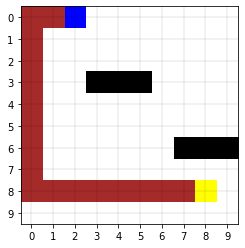

BestPath: ['82', '73', '64', '55', '45', '36', '27', '18', '9', '8', '7', '6', '5', '4', '3', '2', '1', '11', '20']
Timpul de rulare: 0.1314096450805664

-------------------------------------------

Task 3:
Cost: 18


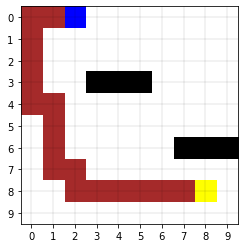

BestPath: ['20', '11', '1', '2', '3', '4', '5', '14', '15', '16', '17', '26', '27', '36', '45', '55', '64', '73', '82']
Timpul de rulare: 0.13441157341003418

-------------------------------------------

Task 4(Euristica schimbata pentru IDA*):
Cost: 18


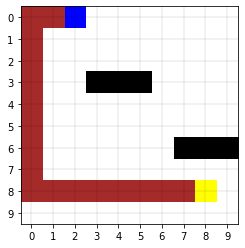

Timpul de rulare: 0.22220945358276367

-------------------------------------------

Task 4(Euristica schimbata pentru LRTA*):
Cost: 18


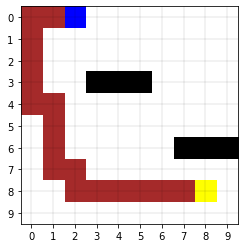

Timpul de rulare: 0.12585020065307617

-------------------------------------------

File: input2.txt
Task 1:
Cost: 89


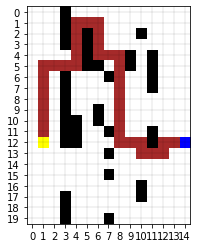

BestPath: ['31', '30', '29', '28', '27', '26', '25', '24', '43', '60', '79', '78', '77', '76', '75', '91', '110', '111', '112', '113', '129', '139', '140', '141', '142', '143', '144', '145', '146', '147', '167', '178', '179', '199', '215', '214', '233', '252']
Timpul de rulare: 0.372006893157959

-------------------------------------------

Task 2:
Cost: 89


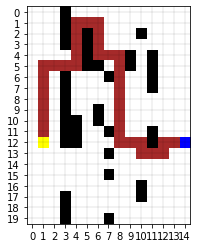

BestPath: ['31', '30', '29', '28', '27', '26', '25', '24', '43', '60', '79', '78', '77', '76', '75', '91', '110', '111', '112', '113', '129', '139', '140', '141', '142', '143', '144', '145', '146', '147', '167', '178', '179', '199', '215', '214', '233', '252']
Timpul de rulare: 0.5044229030609131

-------------------------------------------

Task 3:
Cost: 101


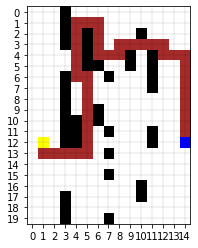

BestPath: ['252', '251', '250', '249', '248', '247', '246', '245', '244', '226', '207', '206', '189', '176', '158', '138', '139', '129', '113', '112', '111', '110', '91', '75', '76', '77', '78', '79', '80', '96', '97', '98', '99', '100', '101', '102', '103', '84', '68', '50', '32', '31']
Timpul de rulare: 0.18439674377441406

-------------------------------------------

Task 4(Euristica schimbata pentru IDA*):
Cost: 89


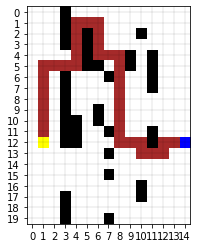

Timpul de rulare: 0.6739976406097412

-------------------------------------------

Task 4(Euristica schimbata pentru LRTA*):
Cost: 101


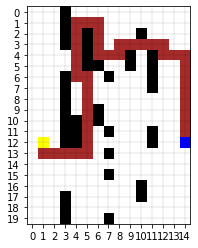

Timpul de rulare: 0.19037866592407227

-------------------------------------------

File: input3.txt
Task 1:
Cost: 139


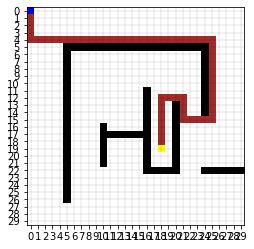

BestPath: ['560', '559', '558', '557', '556', '555', '554', '553', '583', '613', '643', '644', '645', '646', '676', '706', '736', '766', '765', '764', '763', '762', '761', '760', '759', '758', '757', '756', '755', '725', '695', '665', '635', '605', '575', '545', '515', '485', '455', '425', '395', '365', '335', '305', '275', '245', '215', '185', '155', '125', '95', '65', '35', '5', '4', '3', '2', '1']
Timpul de rulare: 1.5340604782104492

-------------------------------------------

Task 2:
Cost: 139


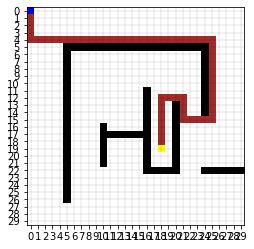

BestPath: ['560', '559', '558', '557', '556', '555', '554', '553', '583', '613', '643', '644', '645', '646', '676', '706', '736', '766', '765', '764', '763', '762', '761', '760', '759', '758', '757', '756', '755', '725', '695', '665', '635', '605', '575', '545', '515', '485', '455', '425', '395', '365', '335', '305', '275', '245', '215', '185', '155', '125', '95', '65', '35', '5', '4', '3', '2', '1']
Timpul de rulare: 2.562204599380493

-------------------------------------------

Task 3:
Cost: 139


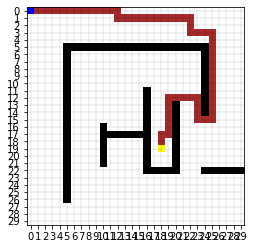

BestPath: ['1', '31', '61', '91', '121', '151', '181', '211', '241', '271', '301', '331', '361', '362', '392', '422', '452', '482', '512', '542', '572', '602', '632', '662', '663', '664', '694', '724', '754', '755', '756', '757', '758', '759', '760', '761', '762', '763', '764', '765', '766', '736', '706', '705', '704', '703', '673', '643', '613', '583', '584', '585', '586', '587', '588', '558', '559', '560']
Timpul de rulare: 0.4713919162750244

-------------------------------------------

Task 4(Euristica schimbata pentru IDA*):
Cost: 139


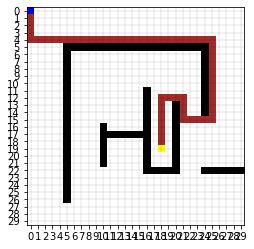

Timpul de rulare: 3.6709632873535156

-------------------------------------------

Task 4(Euristica schimbata pentru LRTA*):
Cost: 139


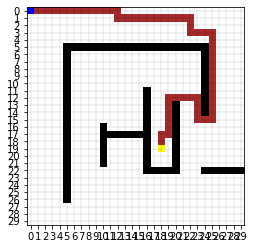

Timpul de rulare: 0.4756326675415039

-------------------------------------------



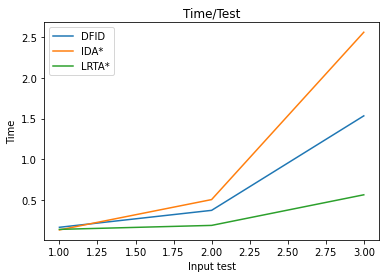

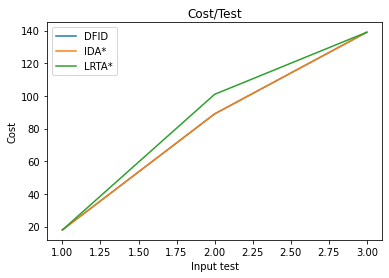

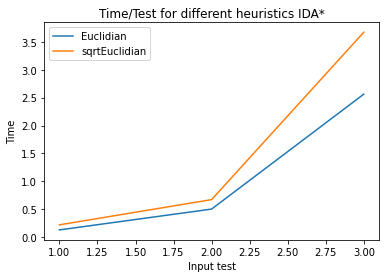

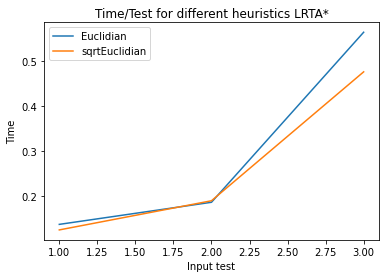

In [ ]:
import copy
import time
import math
import matplotlib.pyplot as plt 


def run_all():
  global total_plot
  file_name1 = "input1.txt"
  file_name2 = "input2.txt"
  file_name3 = "input3.txt"
  total_plot = []
  plot1 = run_homework(file_name1)
  total_plot.append(plot1)
  plot2 = run_homework(file_name2)
  total_plot.append(plot2)
  plot3 = run_homework(file_name3)
  total_plot.append(plot3)
  time_plot(total_plot)
  
run_all()